In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data needed
# grid data

CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[0,:,:]

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

#import grid params for HR grid
HFHR = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/hFacC')
XG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/XG')
YG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/YG')
RAC = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/RAC')

In [3]:
# phyto, PP, zoo, MLD, NO3
# CR data
CR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPhyto.monthly.1999.data', dtype = '>f')
CR_P = CR_P.reshape(12, 160, 360)
CR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntPP.monthly.1999.data', dtype = '>f')
CR_PP = CR_PP.reshape(12, 160, 360)
CR_Z = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/IntZoo.monthly.1999.data', dtype = '>f')
CR_Z = CR_Z.reshape(12, 160, 360)
CR_N = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/nit.monthly.1999.data', dtype = '>f')
CR_N = CR_N.reshape(12, 160, 360)
CR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/mld.monthly.1999.data', dtype = '>f')
CR_mld = CR_mld.reshape(12, 160, 360)

# for m in range(1, 13):
    

# ['phyto', 'pp', 'zoo','nit','mld']
binnedcr = np.zeros([12,160,5])
binnedcr[:,:,0] = np.nanmean(CR_P, axis=2)
binnedcr[:,:,1] = np.nanmean(CR_PP, axis=2)
binnedcr[:,:,2] = np.nanmean(CR_Z, axis=2)
binnedcr[:,:,3] = np.nanmean(CR_N, axis=2)
binnedcr[:,:,4] = np.nanmean(CR_mld, axis=2)



/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [4]:
# phyto, PP, zoo, MLD, NO3
# CR data
HR_P = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_Phyto.1999.data', dtype = '>f')
HR_P = HR_P.reshape(12, 160, 360)
HR_PP = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_PP.1999.data', dtype = '>f')
HR_PP = HR_PP.reshape(12, 160, 360)
HR_Z = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_Z.1999.data', dtype = '>f')
HR_Z = HR_Z.reshape(12, 160, 360)
HR_N = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_N.1999.data', dtype = '>f')
HR_N = HR_N.reshape(12, 160, 360)
HR_mld = np.fromfile('/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_MLD.1999.data', dtype = '>f')
HR_mld = HR_mld.reshape(12, 160, 360)

# ['phyto', 'pp', 'zoo','nit','mld']
binnedhr = np.zeros([12,160,5])
binnedhr[:,:,0] = np.nanmean(HR_P, axis=2)
binnedhr[:,:,1] = np.nanmean(HR_PP, axis=2)
binnedhr[:,:,2] = np.nanmean(HR_Z, axis=2)
binnedhr[:,:,3] = np.nanmean(HR_N, axis=2)
binnedhr[:,:,4] = np.nanmean(HR_mld, axis=2)

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


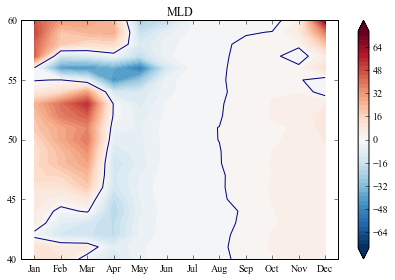

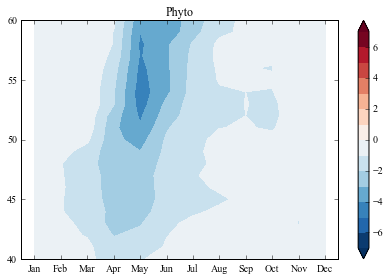

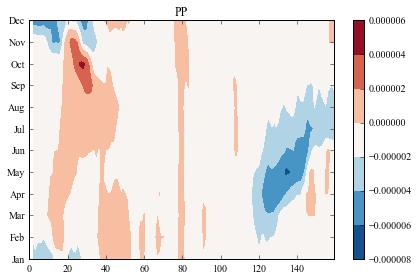

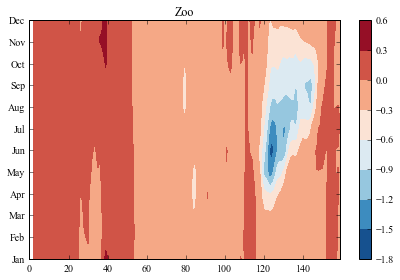

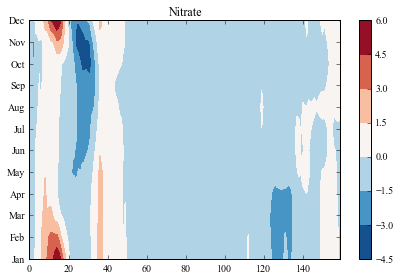

In [5]:
palette1 = plt.get_cmap('RdBu_r', 50)
palette2 = plt.get_cmap('RdYlBu_r', 50)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
lats = ['40', '45','50', '55', '60']
s_to_d = 60*60*24*106

plt.contourf((binnedhr[:,:,4]-binnedcr[:,:,4]).transpose(1,0), levels = range(-75,76, 1),cmap=palette1, extend = 'both')
plt.colorbar()
plt.contour((binnedhr[:,:,4]-binnedcr[:,:,4]).transpose(1,0), levels = [0])
plt.axis([ -0.5, 11.5, 120, 140])
plt.xticks(range(0, 12, 1),months)
plt.yticks(range(120, 145, 5),lats)
plt.title('MLD')
plt.show()

plt.contourf((binnedhr[:,:,0]-binnedcr[:,:,0]).transpose(1,0), levels = range(-7,8, 1),cmap=palette1, extend = 'both')
plt.colorbar()
plt.contour((binnedhr[:,:,0]-binnedcr[:,:,0]).transpose(1,0), levels = [0])
plt.axis([ -0.5, 11.5, 120, 140])
plt.xticks(range(0, 12, 1),months)
plt.yticks(range(120, 145, 5),lats)
plt.title('Phyto')
plt.show()

plt.contourf(binnedhr[:,:,1]-binnedcr[:,:,1], cmap=palette1)
#plt.axis([120, 140, -0.5, 11.5])
plt.colorbar()
plt.yticks(range(0, 12, 1),months)
#plt.xticks(range(120, 145, 5),lats)
plt.title('PP')
plt.show()

plt.contourf(binnedhr[:,:,2]-binnedcr[:,:,2], cmap=palette1)
#plt.axis([120, 140, -0.5, 11.5])
plt.colorbar()
plt.yticks(range(0, 12, 1),months)
#plt.xticks(range(120, 145, 5),lats)
plt.title('Zoo')
plt.show()

plt.contourf(binnedhr[:,:,3]-binnedcr[:,:,3], cmap=palette1)
#plt.axis([120, 140, -0.5, 11.5])
plt.colorbar()
plt.yticks(range(0, 12, 1),months)
#plt.xticks(range(120, 145, 5),lats)
plt.title('Nitrate')
plt.show()

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The shading option was deprecated in version 1.2. Use edgecolors instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


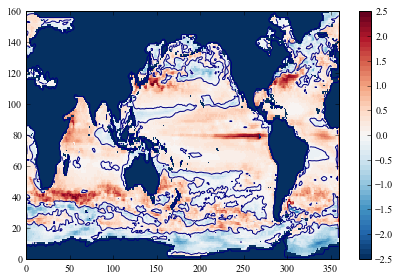

In [6]:
plt.pcolor(np.nanmean(HR_P, 0) - np.nanmean(CR_P, 0), shading = 'flat', cmap = palette1, vmin = -2.5, vmax = 2.5)
plt.colorbar()
plt.contour(np.nanmean(HR_P, 0) - np.nanmean(CR_P, 0),levels = [0])
plt.contour(HFCR,levels = [0])

plt.show()

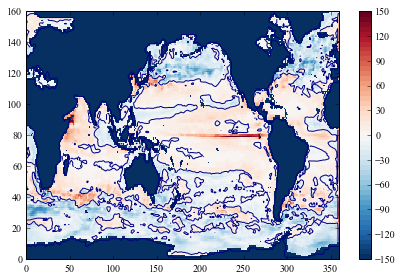

In [7]:
conv = 60*60*24*365

plt.pcolor((np.nanmean(HR_PP, 0) - np.nanmean(CR_PP, 0))*conv, shading = 'flat', cmap = palette1, vmin = -150, vmax = 150)
plt.colorbar()
plt.contour(np.nanmean(HR_PP, 0) - np.nanmean(CR_PP, 0),levels = [0])
plt.contour(HFCR,levels = [0])

plt.show()

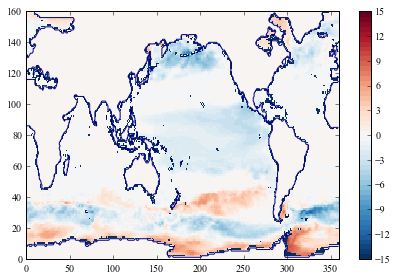

In [8]:
plt.pcolor(np.nanmean(HR_N, 0) - np.nanmean(CR_N, 0), shading = 'flat', cmap = palette1, vmin = -15, vmax = 15)
plt.colorbar()
#plt.contour(np.nanmean(HR_N, 0) - np.nanmean(CR_N, 0),levels = [0])
plt.contour(HFCR,levels = [0])

plt.show()

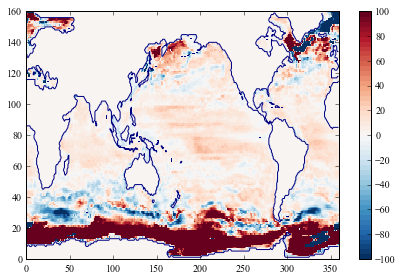

In [9]:
plt.pcolor(np.nanmean(HR_mld, 0) - (np.nanmean(CR_mld, 0)), shading = 'flat', cmap = palette1, vmin = -100, vmax = 100)
plt.colorbar()
#plt.contour(np.nanmean(HR_N, 0) - np.nanmean(CR_N, 0),levels = [0])
plt.contour(HFCR,levels = [0])

plt.show()